In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\교통사고정보개방시스템\자전거 사고다발지역정보\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\교통사고정보개방시스템\\자전거 사고다발지역정보\\AccidentHazard_CodeList.xlsx',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\교통사고정보개방시스템\\자전거 사고다발지역정보\\12_21_bicycle.csv']

In [60]:
meta_df = pd.read_excel(files[0],sheet_name=[0])
df = pd.read_csv(files[1],encoding='cp949')
df.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,161307,2013099,1111013400,11110001,서울특별시 종로구1,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.985544,37.576533,"{""type"":""Polygon"",""coordinates"":[[[126.9871445..."
1,153927,2013099,1111012300,11110002,서울특별시 종로구2,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.981070,37.570279,"{""type"":""Polygon"",""coordinates"":[[[126.9826705..."
2,153929,2013099,1111017500,11110003,서울특별시 종로구3,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.015243,37.572994,"{""type"":""Polygon"",""coordinates"":[[[127.0168437..."
3,139637,2013099,1114016300,11140001,서울특별시 중구1,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.015435,37.569714,"{""type"":""Polygon"",""coordinates"":[[[127.017036,..."
4,153931,2013099,1117012800,11170001,서울특별시 용산구1,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.961790,37.522868,"{""type"":""Polygon"",""coordinates"":[[[126.9633901..."


In [61]:
meta_df = meta_df[0].fillna(method='ffill').groupby([' ','년도'],as_index=False)['searchYearCd 입력값'].max()

In [65]:
meta_df[' '] = meta_df[' '].apply(lambda x:x.replace('\n',' '))
meta_df['구분'] = meta_df.apply(lambda x:x['년도'].split()[0] + ' ' + x[' '],axis=1)

In [68]:
meta_df

,,년도,searchYearCd 입력값,구분
0,결빙 사고다발지역,13-17년 결빙 사고다발지역,2018091.0,13-17년 결빙 사고다발지역
1,결빙 사고다발지역,14-18년 결빙 사고다발지역,2019079.0,14-18년 결빙 사고다발지역
2,결빙 사고다발지역,15-19년 결빙 사고다발지역,2020036.0,15-19년 결빙 사고다발지역
3,결빙 사고다발지역,16-20년 결빙 사고다발지역,2021029.0,16-20년 결빙 사고다발지역
4,결빙 사고다발지역,17-21년 결빙 사고다발지역,2022082.0,17-21년 결빙 사고다발지역
...,...,...,...,...
73,지자체별 사고다발지역,18년 지자체별 사고다발지,2019056.0,18년 지자체별 사고다발지역
74,지자체별 사고다발지역,19년 지자체별 사고다발지,2020087.0,19년 지자체별 사고다발지역
75,지자체별 사고다발지역,20년 지자체별 사고다발지,2021056.0,20년 지자체별 사고다발지역
76,지자체별 사고다발지역,21년 지자체별 사고다발지,2022046.0,21년 지자체별 사고다발지역


In [106]:
re.search(r'[^0-9]*','화성시1')[0]

'화성시'

In [76]:
meta_df[meta_df['searchYearCd 입력값']==2020087.0].index[0]

74

In [79]:
def convert_id(x):
    idx = meta_df[meta_df['searchYearCd 입력값']==x].index[0]
    return meta_df['구분'].loc[idx]
df['사고다발지ID'] = df['사고다발지ID'].apply(convert_id)

In [107]:
df['시도'] = df['시도시군구명'].apply(lambda x:x.split()[0])
df['구군'] = df['시도시군구명'].apply(lambda x:re.search(r'[^0-9]*',x.split()[1])[0])

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357 entries, 0 to 4356
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사고다발지FID  4357 non-null   int64  
 1   사고다발지ID   4357 non-null   object 
 2   법정동코드     4357 non-null   int64  
 3   지점코드      4357 non-null   int64  
 4   시도시군구명    4357 non-null   object 
 5   지점명       4357 non-null   object 
 6   발생건수      4357 non-null   int64  
 7   사상자수      4357 non-null   int64  
 8   사망자수      4357 non-null   int64  
 9   중상자수      4357 non-null   int64  
 10  경상자수      4357 non-null   int64  
 11  부상신고자수    4357 non-null   int64  
 12  경도        4357 non-null   float64
 13  위도        4357 non-null   float64
 14  다발지역폴리곤   4357 non-null   object 
 15  시도        4357 non-null   object 
 16  구군        4357 non-null   object 
dtypes: float64(2), int64(9), object(6)
memory usage: 578.8+ KB


In [109]:
df.describe()

,사고다발지FID,법정동코드,지점코드,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
count,4.357000e+03,4.357000e+03,4.357000e+03,4357.000000,4357.000000,4357.000000,4357.000000,4357.000000,4357.000000,4357.000000,4357.000000
mean,5.220938e+06,2.702350e+09,2.702339e+07,5.295846,5.566674,0.077576,1.856323,2.905669,0.727106,127.509857,36.842257
std,2.429898e+06,1.384956e+09,1.384955e+07,1.559477,1.788641,0.276813,1.293132,1.544580,0.960483,0.816065,0.883520
min,1.393920e+05,1.111010e+09,1.111000e+07,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,126.373671,33.485139
25%,6.095939e+06,1.156011e+09,1.156001e+07,4.000000,4.000000,0.000000,1.000000,2.000000,0.000000,126.914920,35.887874
50%,6.302702e+06,2.723013e+09,2.723002e+07,5.000000,5.000000,0.000000,2.000000,3.000000,0.000000,127.080000,37.409316
75%,6.519672e+06,4.127110e+09,4.127100e+07,6.000000,6.000000,0.000000,3.000000,4.000000,1.000000,128.522785,37.536742
max,6.807362e+06,5.011014e+09,5.011000e+07,17.000000,22.000000,2.000000,8.000000,15.000000,9.000000,129.431277,38.210994


In [110]:
df.describe(include=np.object)

,사고다발지ID,시도시군구명,지점명,다발지역폴리곤,시도,구군
count,4357,4357,4357,4357,4357,4357
unique,10,876,3742,4357,17,139
top,15년 자전거사고 다발지역,경상북도 상주시1,대구광역시 서구 비산동(북비산네거리 부근),"{""type"":""Polygon"",""coordinates"":[[[126.9871445...",서울특별시,송파구
freq,597,10,8,1,1683,255


**연도별 사상자 및 비율은?**

**각 시도의 연도별 발생건수는?**

**각 시도의 구군별 발생건수는?**

## 시각화

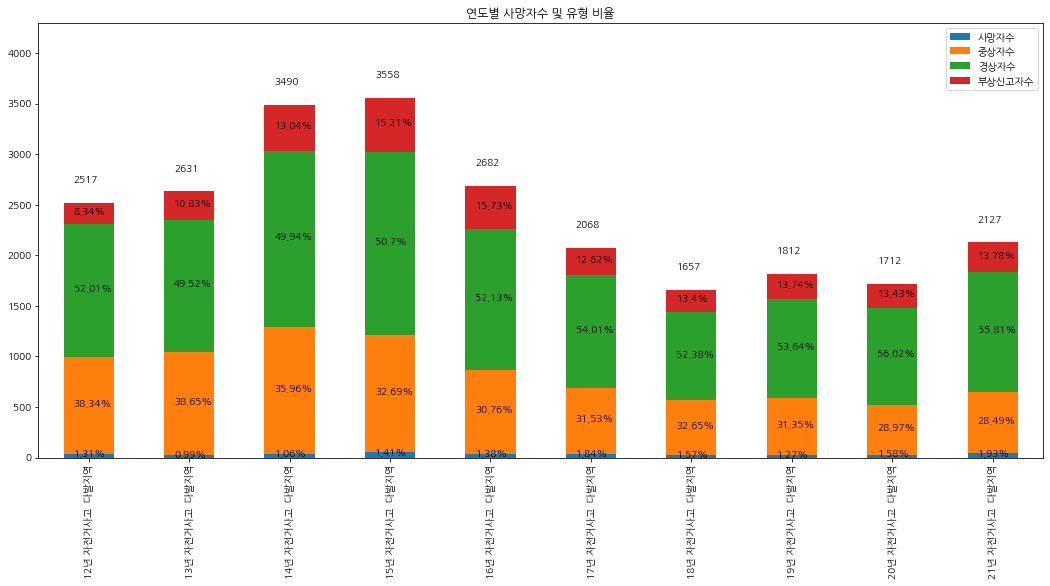

In [114]:
fig,axes = plt.subplots(1,1,figsize=(18,8))
axes.set_ylim([0,4300])
axes.set_title('연도별 사망자수 및 유형 비율')
sub_df = df.groupby('사고다발지ID',as_index=False)[['사망자수','중상자수','경상자수','부상신고자수']].sum()
bars = sub_df.iloc[:,[1,2,3,4]].plot(kind='bar', stacked=True,ax=axes)
xticks = plt.xticks([i for i in range(len(sub_df))],labels=sub_df['사고다발지ID'].values)
for i in range(len(sub_df)):
    height = axes.patches[i].get_height() + axes.patches[i+10].get_height() + axes.patches[i+20].get_height() + axes.patches[i+30].get_height()
    h1 = round(axes.patches[i].get_height()/height*100,2)
    h2 = round(axes.patches[i+10].get_height()/height*100,2)
    h3 = round(axes.patches[i+20].get_height()/height*100,2)
    h4 = round(axes.patches[i+30].get_height()/height*100,2)
    height = int(height)
    ann_height = height+200
    axes.annotate(str(height),(axes.patches[i].get_x()+0.1, ann_height))
    axes.annotate(str(h1)+'%',(axes.patches[i].get_x()+0.1, 0.5*h1/100*height))
    axes.annotate(str(h2)+'%',(axes.patches[i].get_x()+0.1, (h1+0.5*h2)/100*height))
    axes.annotate(str(h3)+'%',(axes.patches[i].get_x()+0.1, (h1+h2+0.5*h3)/100*height))
    axes.annotate(str(h4)+'%',(axes.patches[i].get_x()+0.1, (h1+h2+h3+0.5*h4)/100*height))

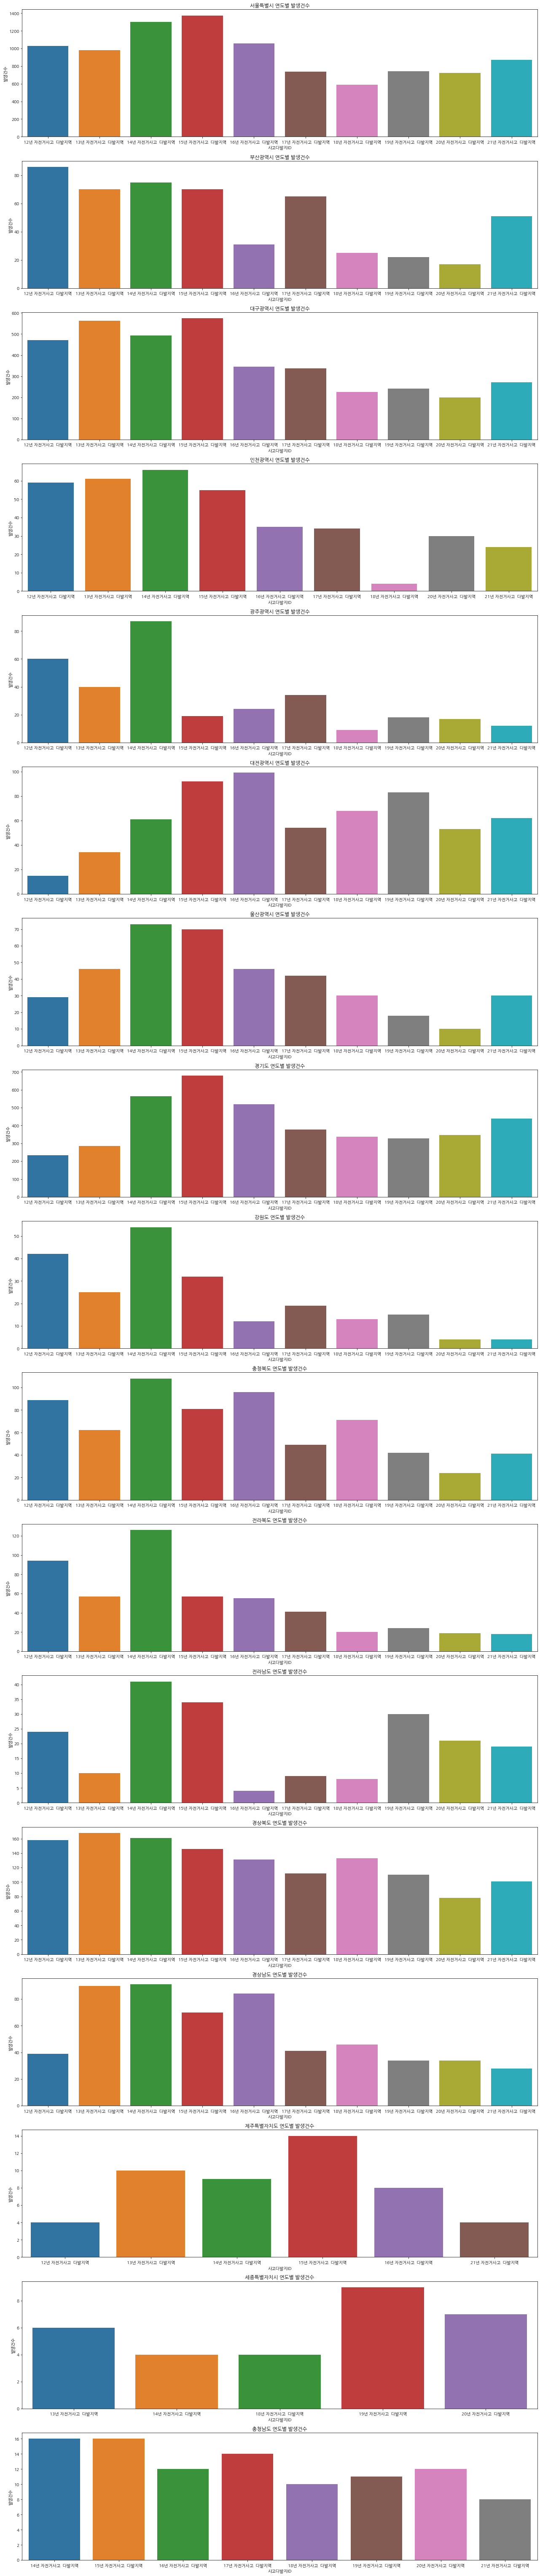

In [132]:
fig,axes = plt.subplots(17,1,figsize=(18,85))
for i,c in enumerate(df['시도'].unique()):
    sub_df = df[df['시도']==c].groupby('사고다발지ID',as_index=False)['발생건수'].sum()
    sns.barplot(data=sub_df,x='사고다발지ID',y='발생건수',ax=axes[i]).set(title=f'{c} 연도별 발생건수')
plt.tight_layout()

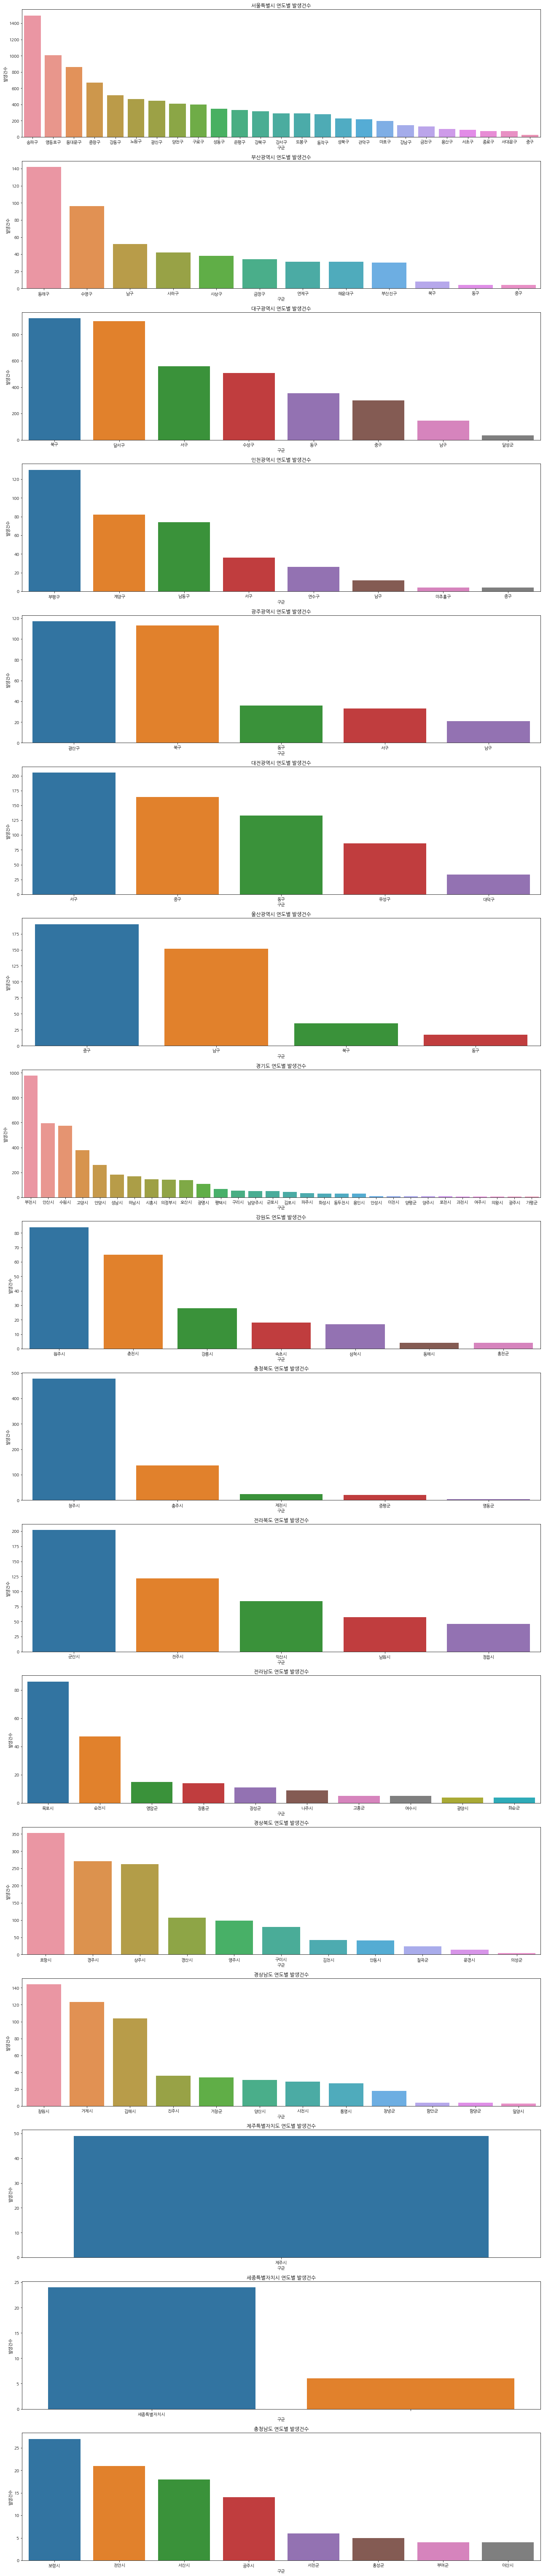

In [133]:
fig,axes = plt.subplots(17,1,figsize=(18,85))
for i,c in enumerate(df['시도'].unique()):
    sub_df = df[df['시도']==c].groupby('구군',as_index=False)['발생건수'].sum().sort_values('발생건수',ascending=False)
    sns.barplot(data=sub_df,x='구군',y='발생건수',ax=axes[i]).set(title=f'{c} 연도별 발생건수')
plt.tight_layout()
    